  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Pandas Tutorial -->  
	  <center>
	    <br>
 <h1>Análisis del COVID-19 con Matplotlib y Seaborn</h1>
        <br>
        <br>
        <strong> Análisis de Datos con Python </strong>
	  </center>
    <!-- Pandas Tutorial -->
  </div>
<!-- ---------------------------------------------------- -->

### Importación de librerías y dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context("paper")

C:\Users\alesj\AppData\Local\Temp\ipykernel_22088\1562239162.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("covid_19_clean_complete.csv", parse_dates = ['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


### Paso 1. Revisión de Datos Nulos

In [3]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

### Paso 2. Renombrar las columnas a español. Usa el siguiente diccionario
{'Date': 'fecha',
                     'Province/State':'estado',
                     'Country/Region':'pais',
                     'Lat':'lat', 'Long':'long',
                     'Confirmed': 'confirmados',
                     'Deaths':'fallecidos',
                     'Recovered':'recuperados'
                    },


In [9]:
df = df.rename(columns={'Date': 'fecha',
            'Province/State':'estado',
            'Country/Region':'pais',
            'Lat':'lat', 'Long':'long',
            'Confirmed': 'confirmados',
            'Deaths':'fallecidos',
            'Recovered':'recuperados'
        })
df.head()

,estado,pais,lat,long,fecha,confirmados,fallecidos,recuperados,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


### Paso 3. Calcula los casos Activos, que son los cofirmados, menos los fallecidos y menos los recuperados

In [8]:
casos_Activos = df["confirmados"].sum() - df["fallecidos"].sum() - df["recuperados"].sum()
print("Casos Activos:", casos_Activos)

Casos Activos: 396715350


### Parte A. Casos confirmados en todo el mundo a lo largo del tiempo

### Paso 4. Agrupa por fecha y muestra la suma de las columnas fecha y confirmados.
* Resetea el índice
* Guarda el dataframe agrupado en la variable total_cases


In [17]:
total_cases = df.groupby(["fecha"])[["confirmados"]].sum().reset_index()
print(total_cases)

         fecha  confirmados
0   2020-01-22          555
1   2020-01-23          654
2   2020-01-24          941
3   2020-01-25         1434
4   2020-01-26         2118
5   2020-01-27         2927
6   2020-01-28         5578
7   2020-01-29         6166
8   2020-01-30         8234
9   2020-01-31         9927
10  2020-02-01        12038
11  2020-02-02        16787
12  2020-02-03        19887
13  2020-02-04        23898
14  2020-02-05        27643
15  2020-02-06        30802
16  2020-02-07        34334
17  2020-02-08        37068
18  2020-02-09        40095
19  2020-02-10        42633
20  2020-02-11        44675
21  2020-02-12        46561
22  2020-02-13        60206
23  2020-02-14        66690
24  2020-02-15        68765
25  2020-02-16        70879
26  2020-02-17        72815
27  2020-02-18        74609
28  2020-02-19        75030
29  2020-02-20        75577
30  2020-02-21        76206
31  2020-02-22        77967
32  2020-02-23        78290
33  2020-02-24        78854
34  2020-02-25      

### Paso 5. Realiza un gráfico de línea con el dataframe total_cases
* Coloca de tamaño de la figura figsize= (15,10)
* Coloca de título "Casos confirmados en todo el mundo a lo largo del tiempo" con tamaño de letra de 30
* Utiliza seaborn para realizar el lineplot. Coloca la línea de color rojo
* Coloca xticks de rotation de 90 y tamaño de letra de 10
* Coloca yticks de tamaño de letra de 15
* Cambia xlabel por "Fechas" y tamaño de letra de 20
* Cambia ylabel por "Casos Totales" y tamaño de letra de 20

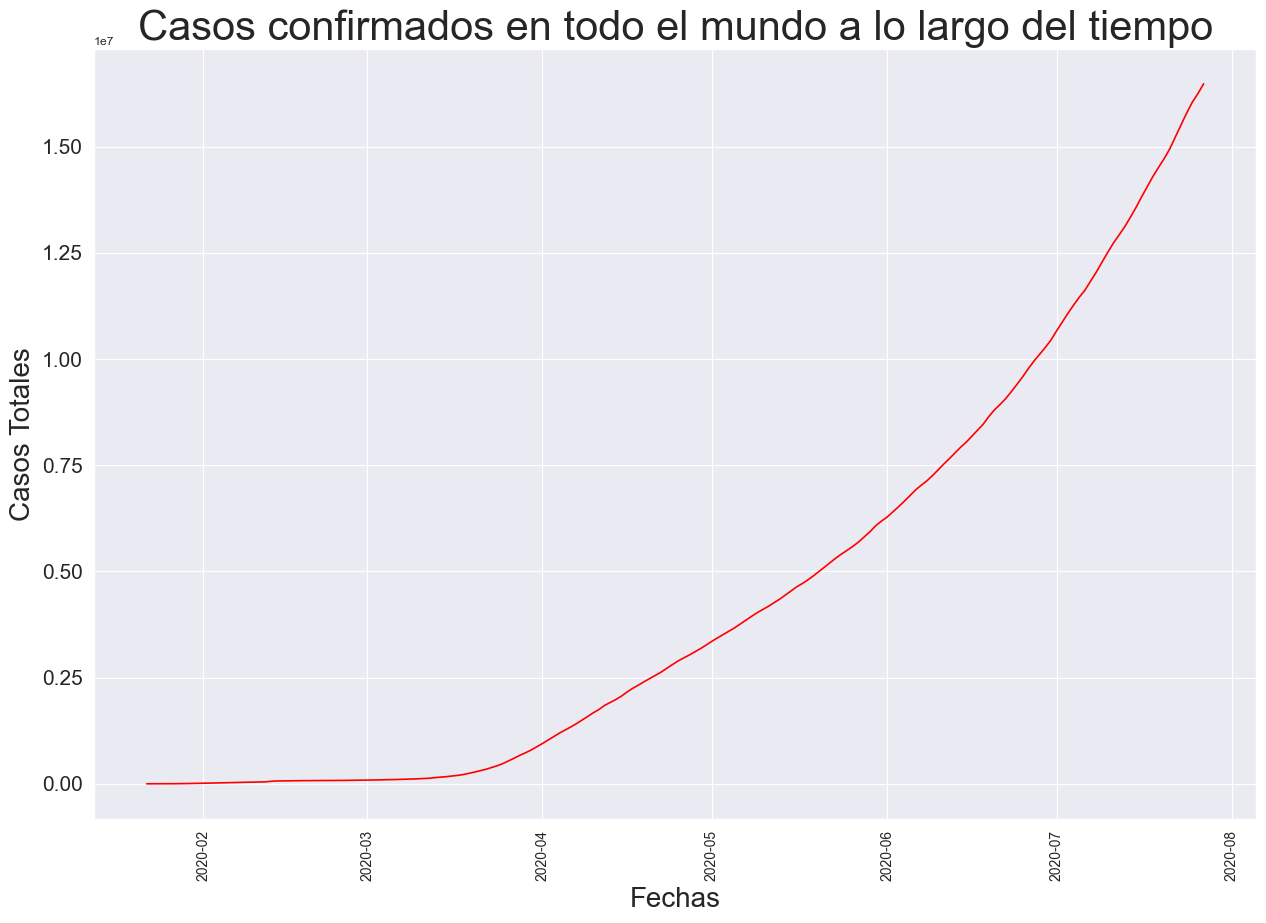

In [23]:
plt.figure(figsize=(15,10))
sns.lineplot(x="fecha", y="confirmados", data=total_cases, color="Red")
plt.title("Casos confirmados en todo el mundo a lo largo del tiempo", fontsize=30)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Fechas", fontsize=20)
plt.ylabel("Casos Totales", fontsize=20)
plt.show()

Observaciones del gráfico:
##### 1) La pendiente de la línea, al principio, fue ascendiendo gradualmente y en los últimos tiempos, ¡es muy alta!
##### 2) Al ritmo actual, no hay signos de caída en el total de casos.
##### 3) Si no se toman medidas de protección, no es de extrañar que la pendiente alcance el máximo

### Parte B. Los 20 países principales que tienen más casos confirmados

### Paso 6. Filtra df por las filas con la fecha máxima
* Guarda el dataframe filtrado en la variable top

In [27]:
top = df[df['fecha'] == df["fecha"].max()]
print(top.head())

      estado         pais       lat       long      fecha  confirmados  \
48807    NaN  Afghanistan  33.93911  67.709953 2020-07-27        36263   
48808    NaN      Albania  41.15330  20.168300 2020-07-27         4880   
48809    NaN      Algeria  28.03390   1.659600 2020-07-27        27973   
48810    NaN      Andorra  42.50630   1.521800 2020-07-27          907   
48811    NaN       Angola -11.20270  17.873900 2020-07-27          950   

       fallecidos  recuperados  Active             WHO Region  
48807        1269        25198    9796  Eastern Mediterranean  
48808         144         2745    1991                 Europe  
48809        1163        18837    7973                 Africa  
48810          52          803      52                 Europe  
48811          41          242     667                 Africa  


### Paso 7. Agrupa por país y muestra la suma de las columnas confirmados.
* Ordena el dataframe de mayor a menor
* Resetea el index
* Guarda el dataframe agrupado en la variable top_casualities SOLO LAS 20 PRIMERAS FILAS


In [32]:
top_casualities = top.groupby("pais")["confirmados"].sum().reset_index()
top_casualities = top_casualities.sort_values(by="confirmados", ascending=False).head(20)
print(top_casualities)

               pais  confirmados
173              US      4290259
23           Brazil      2442375
79            India      1480073
138          Russia       816680
154    South Africa       452529
111          Mexico       395489
132            Peru       389717
35            Chile       347923
177  United Kingdom       301708
81             Iran       293606
128        Pakistan       274289
157           Spain       272421
145    Saudi Arabia       268934
37         Colombia       257101
85            Italy       246286
172          Turkey       227019
13       Bangladesh       226225
61           France       220352
65          Germany       207112
6         Argentina       167416


### Paso 8. Realiza un gráfico de barra horizontal sobre  los 20 países principales que tienen más casos confirmados con el dataframe top_casualities
* Coloca de tamaño de la figura figsize= (15,10)
* Coloca de título "Top de 20 países que tienen más casos confirmados" con tamaño de letra de 30
* Utiliza seaborn para realizar el barplot.
* Coloca xticks tamaño de letra de 10
* Coloca yticks de tamaño de letra de 10
* Cambia xlabel por "Casos Totales" y tamaño de letra de 20
* Cambia ylabel por "País" y tamaño de letra de 20
* Realiza un for para poder colocar con ax.text los valores de casos en la punta de la barra

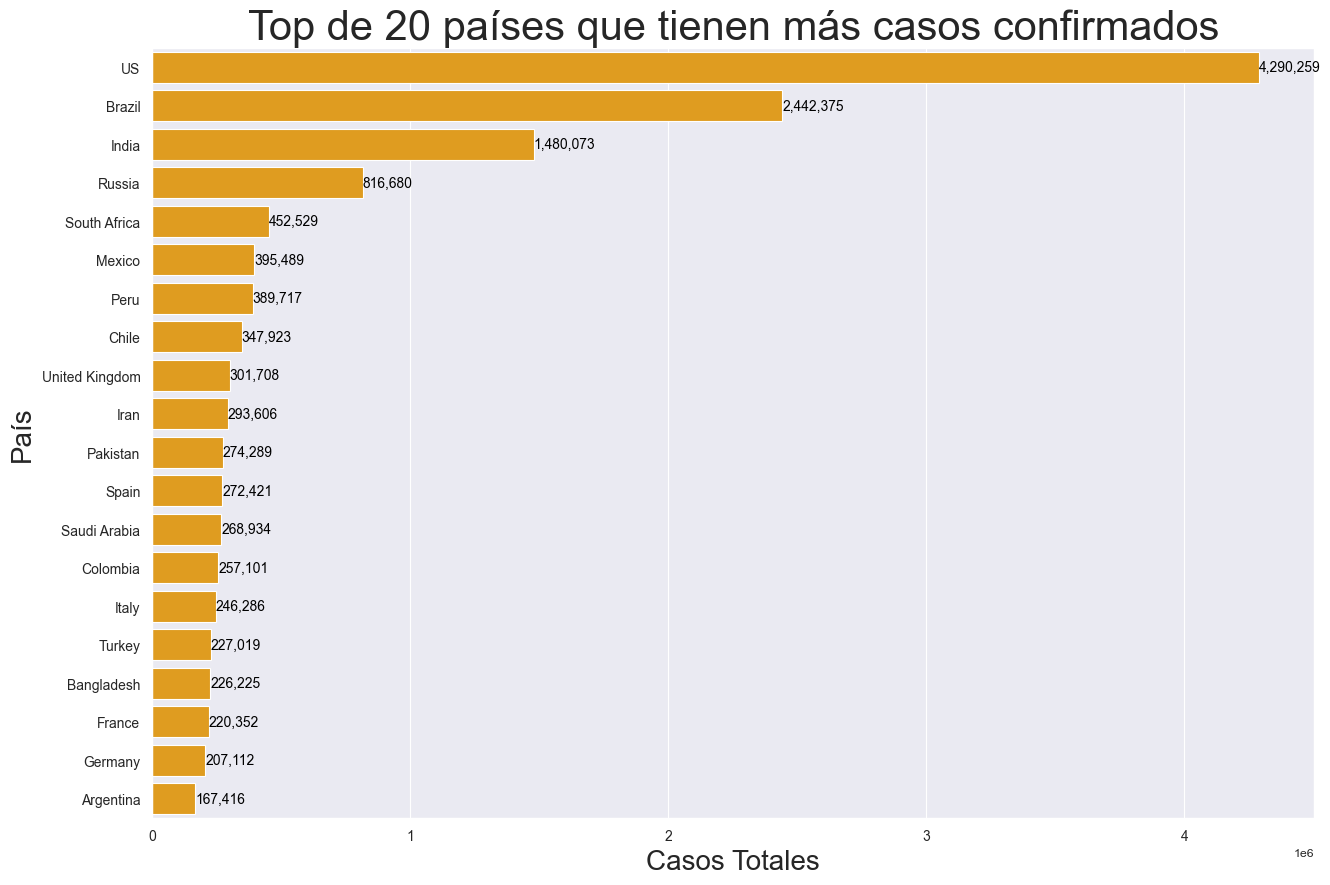

In [40]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="confirmados", y="pais", data=top_casualities, color="orange")
plt.title("Top de 20 países que tienen más casos confirmados", fontsize=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Casos Totales", fontsize=20)
plt.ylabel("País", fontsize=20)

for index, value in enumerate(top_casualities['confirmados']):
    ax.text(value, index, f'{value:,}', ha='left', va='center', fontsize=10, color='black')

plt.show()

### C. Los 20 países principales que tienen más casos activos


### Paso 9. Agrupa por país y muestra la suma de las columna activos en el dataframe top.
* Ordena el dataframe de mayor a menor
* Resetea el index
* Guarda el dataframe agrupado en la variable top_actives SOLO LAS 20 PRIMERAS FILAS


### Paso 10. Realiza un gráfico de barra horizontal sobre  los 20 países principales que tienen más casos activos con el dataframe top_actives
* Coloca de tamaño de la figura figsize= (15,10)
* Coloca de título "Top de 20 países que tienen más casos activos" con tamaño de letra de 30
* Utiliza seaborn para realizar el barplot.
* Coloca xticks tamaño de letra de 15
* Coloca yticks de tamaño de letra de 15
* Cambia xlabel por "Casos Totales" y tamaño de letra de 20
* Cambia ylabel por "País" y tamaño de letra de 20
* Realiza un for para poder colocar con ax.text los valores de casos en la punta de la barra

### E. Los 20 países principales que tienen más casos recuperados

### Paso 11. Agrupa por país y muestra la suma de la columna recuperados.
* Ordena el dataframe de mayor a menor
* Resetea el index
* Guarda el dataframe agrupado en la variable top_recovered SOLO LAS 20 PRIMERAS FILAS

### Paso 12. Realiza un gráfico de barra horizontal sobre los 20 países principales que tienen más casos recuperados con el dataframe top_recovered
* Coloca de tamaño de la figura figsize= (15,10)
* Coloca de título "Top de 20 países que tienen más casos recuperados" con tamaño de letra de 30
* Utiliza seaborn para realizar el barplot.
* Coloca xticks tamaño de letra de 15
* Coloca yticks de tamaño de letra de 15
* Cambia xlabel por "Casos Totales" y tamaño de letra de 20
* Cambia ylabel por "País" y tamaño de letra de 20
* Realiza un for para poder colocar con ax.text los valores de casos en la punta de la barra

### F. Los 10 países principales que tienen la peor mortalidad y la mejor tasa de recuperación:

### Paso 13. Agrupa el dataframe top por país y realiza la suma de las columnas ['recuperados','confirmados','fallecidos']
* Resetea el index
* Guarda la agrupación en un dataframe llamado rate

### Paso 14. Crea dos nuevas columnas en rate: 'recuperados porcentaje' y 'fallecidos porcentaje'
* recuperados porcentaje va ser igual a la columna recuperados entre confirmados*100 y redondeado a 2 decimales
* fallecidos porcentaje va ser igual a la columna recuperados entre confirmados*100 y redondeado a 2 decimales

### Paso 15.  Agrupa el dataframe rate por país y realiza la suma de la columna 'fallecidos porcentaje'
* Ordena el dataframe de mayor a menor
* Resetea el index
* Guarda el dataframe agrupado en la variable mortality SOLO LAS 10 PRIMERAS FILAS

### Paso 16. Realiza un gráfico de barras sobre los 10 países principales que tienen que tienen la peor mortalidad usando el dataframe mortality
* Coloca de tamaño de la figura figsize= (15,10)
* Coloca de título "Top 10 países con mayor tasa de mortalidad" con tamaño de letra de 30
* Utiliza seaborn para realizar el barplot.
* Coloca xticks tamaño de letra de 15
* Coloca yticks de tamaño de letra de 15
* Cambia xlabel por "Casos Totales" y tamaño de letra de 20
* Cambia ylabel por "País" y tamaño de letra de 20
* Realiza un for para poder colocar con ax.text los valores de casos en la punta de la barra

### Paso 17.  Agrupa el dataframe top por país y realiza la suma de la columna 'recuperados porcentaje'
* Ordena el dataframe de mayor a menor
* Resetea el index
* Guarda el dataframe agrupado en la variable recovery SOLO LAS 10 PRIMERAS FILAS

### Paso 18. Realiza un gráfico de barras sobre los 10 países principales que tienen que tienen la mayor tasa de recuperación usando el dataframe recovery
* Coloca de tamaño de la figura figsize= (15,10)
* Coloca de título "Top 10 países con mayor tasa de recuperación" con tamaño de letra de 30
* Utiliza seaborn para realizar el barplot.
* Coloca xticks tamaño de letra de 15
* Coloca yticks de tamaño de letra de 15
* Cambia xlabel por "Casos Totales" y tamaño de letra de 20
* Cambia ylabel por "País" y tamaño de letra de 20
* Realiza un for para poder colocar con ax.text los valores de casos en la punta de la barra

### Análisis de los países más afectados

Seleccionaré los países más afectados para su posterior análisis y visualización, es decir, China, EE. UU., Italia.
También seleccionaré España.
El análisis y las visualizaciones de los casos de covid en cada país comenzarán desde el día de su primer caso de covid-19. A partir de esto, podemos obtener información valiosa como la tasa de crecimiento del virus covid-19.


##### El primer caso de China registrado en este conjunto de datos es el 22 de enero de 2020. Así que considerámoslo como el día 1 y realicemos los cambios necesarios en el conjunto de datos.


In [6]:
china =  df[df.pais == 'China']
china = china.groupby(by = 'fecha')['recuperados', 'fallecidos', 'confirmados', 'activos'].sum().reset_index()
china.head()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

##### El primer caso registrado en EE. UU. Es el 24 de febrero de 2020. Considérelo el día 1 y hagamos los cambios necesarios en el conjunto de datos.


In [ ]:
us =  df[df.pais == 'US']
us = us.groupby(by = 'fecha')['recuperados', 'fallecidos', 'confirmados', 'activos'].sum().reset_index()
us = us.iloc[33:].reset_index().drop('index', axis = 1)
us.head()

In [ ]:
italy =  df[df.pais == 'Italy']
italy = italy.groupby(by = 'fecha')['recuperados', 'fallecidos', 'confirmados', 'activos'].sum().reset_index()
italy = italy.iloc[9:].reset_index().drop('index', axis = 1)
italy.head()

In [ ]:
spain =  df[df.pais == 'Spain']
spain = spain.groupby(by = 'fecha')['recuperados', 'fallecidos', 'confirmados', 'activos'].sum().reset_index()
spain = spain.iloc[10:].reset_index().drop('index', axis = 1)
spain.head()

### Paso 20. Realiza un conjunto de 4 gráficos de los casos confirmados con subplots
* Coloca de tamaño de la figura figsize= (15,10).

* Coloca el primer subplot en la posición (4, 2, 1).
* Dibuja un lineplot con x el índice del dataframe china y en y la columna confirmados.
* Coloca de título "Casos Confirmados en China" con un tamaño de letra de 25.
* Colocar de xlabel "Nro. de días" con tamaño de letra 15
* Colocar de xlabel "Total de Casos" con tamaño de letra 15


* Coloca el segundo subplot en la posición (4, 2, 2).
* Dibuja un lineplot con x el índice del dataframe us y en y la columna confirmados.
* Coloca de título "Casos Confirmados en USA" con un tamaño de letra de 25.
* Colocar de xlabel "Nro. de días" con tamaño de letra 15
* Colocar de xlabel "Total de Casos" con tamaño de letra 15


* Coloca el tercer subplot en la posición (4, 2, 3).
* Dibuja un lineplot con x el índice del dataframe italy y en y la columna confirmados.
* Coloca de título "Casos Confirmados en Italia" con un tamaño de letra de 25.
* Colocar de xlabel "Nro. de días" con tamaño de letra 15
* Colocar de xlabel "Total de Casos" con tamaño de letra 15


* Coloca el cuarto subplot en la posición (4, 2, 2).
* Dibuja un lineplot con x el índice del dataframe spain y en y la columna confirmados.
* Coloca de título "Casos Confirmados en España" con un tamaño de letra de 25.
* Colocar de xlabel "Nro. de días" con tamaño de letra 15
* Colocar de xlabel "Total de Casos" con tamaño de letra 15



##### Aquí están mis observaciones:
##### 1) Desde el día 0 al día 15, China tiene una pendiente muy alta ya que el covid-19 se originó allí. Mientras que en otros países, la pendiente es bastante baja.
##### 2) Después del día 15, hubo un aumento gradual en el número de casos en los EE. UU., Mientras que en Italia y España es aún menor.
##### 3) Pero después de eso, hay un aumento alto en el n. de casos en EE. UU. e Italia
##### 4) España ha aumentado los contagios considerablemente en los últimos meses

### Paso 20. Realiza un conjunto de 4 gráficos de los casos activos con subplots
* Coloca de tamaño de la figura figsize= (15,10).

* Coloca el primer subplot en la posición (4, 2, 1).
* Dibuja un pointplot con x el índice del dataframe china y en y la columna activos.
* Coloca de título "Casos Confirmados en China" con un tamaño de letra de 25.
* Colocar de xlabel "Nro. de días" con tamaño de letra 15
* Colocar de xlabel "Total de Casos" con tamaño de letra 15


* Coloca el segundo subplot en la posición (4, 2, 2).
* Dibuja un pointplot con x el índice del dataframe us y en y la columna activos.
* Coloca de título "Casos Confirmados en USA" con un tamaño de letra de 25.
* Colocar de xlabel "Nro. de días" con tamaño de letra 15
* Colocar de xlabel "Total de Casos" con tamaño de letra 15


* Coloca el tercer subplot en la posición (4, 2, 3).
* Dibuja un pointplot con x el índice del dataframe italy y en y la columna activos.
* Coloca de título "Casos Confirmados en Italia" con un tamaño de letra de 25.
* Colocar de xlabel "Nro. de días" con tamaño de letra 15
* Colocar de xlabel "Total de Casos" con tamaño de letra 15


* Coloca el cuarto subplot en la posición (4, 2, 2).
* Dibuja un pointplot con x el índice del dataframe spain y en y la columna activos.
* Coloca de título "Casos Confirmados en España" con un tamaño de letra de 25.
* Colocar de xlabel "Nro. de días" con tamaño de letra 15
* Colocar de xlabel "Total de Casos" con tamaño de letra 15


##### Aquí están mis observaciones:
##### 1) Muestra los mismos conocimientos que los casos confirmados
##### 2) Pero la única diferencia es que el número de casos activos en China ha ido disminuyendo gradualmente desde el día 30, ya que hubo algunas muertes y muchas personas recuperadas y también han evitado la propagación del covid-19. virus.
##### 3) El no. de los casos activos en los EE. UU. e España está aumentando negativamente.